<a href="https://colab.research.google.com/github/Ngaspar20/Initial/blob/main/PYF_Project_LearnerNotebook_FullCode_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [6]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [7]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [8]:
# # uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Write your code here to read the data
data = pd.read_csv('/content/foodhub_order.csv')

In [10]:
# Write your code here to view the first 5 rows

data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [11]:
# Write your code here
data.shape

(1898, 9)

#### Observations:
- There are 9 columns and 1898 rows in the data set

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [12]:
# Write your code here

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three data types in the dataset and these are:
- order_id, customer_id, food_preparation_time and delivery_time - Int64(integers) type
- restaurant_name, cuisine_type, day_of_the_week and rating - objects(categorical data) type
- cost_of_the_order is - float64 type

There are 1 float64, 4 int64 and 4 objects

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [13]:
# Write your code here
data.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the dataset because we can see in the shape info output that we have 1898 rows 9 columns, and the non-null summary for each of the variables show exactly 1898 which means there are no null values. In addition the code above shows that there are no Trues which means that there is 0 nan values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
# Write your code here

data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
- The minimum time that takes the food to be prepared is 20 min;
- The average time it takes to prepare the food is 27.37 min;
- The maximum time it takes is 35 min;




### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
# Write the code here - first option
count = 0
ratings_series = pd.Series(data['rating'])

for i in ratings_series:
    if i == 'Not given':
        count += 1

print(f"The number of orders not rated is: {count}")


The number of orders not rated is: 736


In [16]:
# Write the code here - second option
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [17]:
data['rating'].value_counts(normalize = True) * 100

,proportion
rating,
Not given,38.777661
5,30.979979
4,20.337197
3,9.905163


#### Observations:

There are 736 orders that the ratings is 'Not given' in the column 'ratings' which representes about aprox 39% of the data points in the variable rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [18]:
# Write the code here
# I will perform a univariate analysis where i will analyze variable by variable

data.describe().T # this syntax shows the summary of all quantitative data




,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


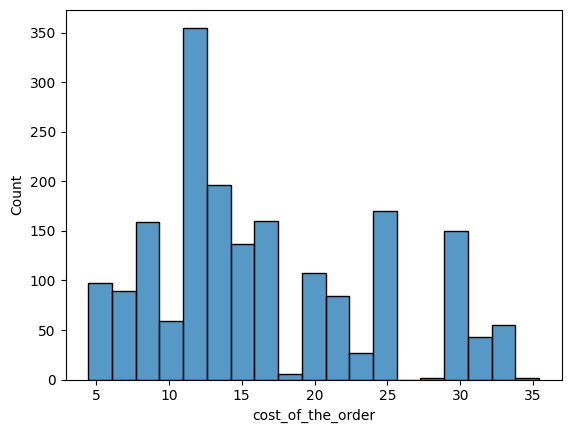

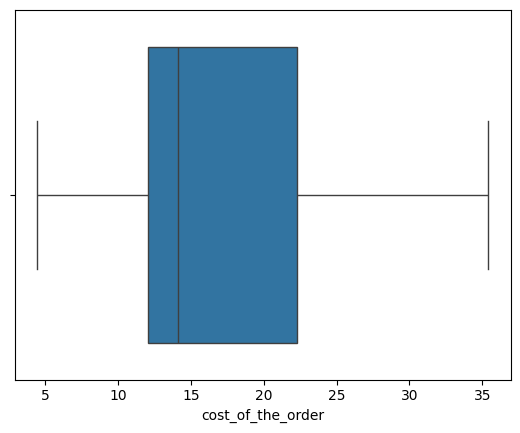

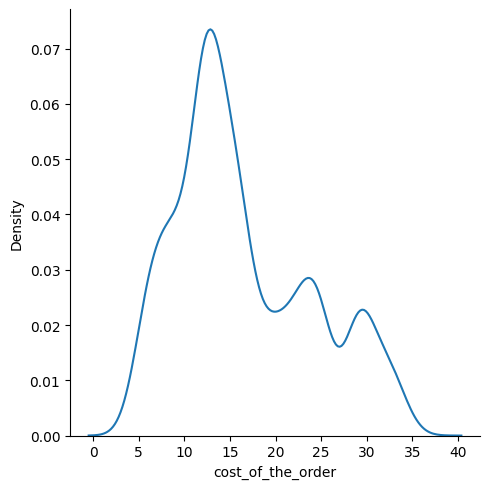

In [19]:
# this syntax will show the histogram distribution of the variable 'cost_of_the_order'
sns.histplot(data = data, x = 'cost_of_the_order');
plt.show()
sns.boxplot(data = data, x = 'cost_of_the_order')
plt.show()
sns.displot(data=data,x='cost_of_the_order',kind='kde')
plt.show()

#### Observations:

- Firstly i showed all the quantitative variables using the describe function which shows the summary statistics of all the quantitave variables
- Plotted the variable in a histogram, boxplot a kernel density estimate plot (kde) to see the distribution of the variable
- The plots show that there are no outliers and that the distribution is sligthly to the right. Also we can see in the histogram as well as in the kde chart that the distribution is multimodal
- The median cost of an order is between 13 and 14 with the minimum of 5  as we can see in the lowest wisker, and the maximum of 35 as per the higher wisker. 25% of the orders cost less then 12 and 75% of the orders cost less or no more then 22.5.




- The histogram is right-skewed (positively skewed), with the highest frequency of orders around 10–13 units. There is a sharp drop in frequency after the peak, with a long tail extending toward higher values (above 25). This suggests that most orders are inexpensive, but some can be quite costly.
- The boxplot confirms the right-skewed nature of the data. The median is slightly left of center (around 14), indicating more low-cost orders. No outliers are visible, but the whisker to the right is longer, again suggesting a longer tail on the high-cost side.
- The KDE shows a main peak around 13–14, with minor peaks around 25 and 30, indicating multimodality — possibly due to different product or service categories. The density curve supports the observation that most orders are clustered in the lower cost range, with a few expensive orders creating a tail on the right.






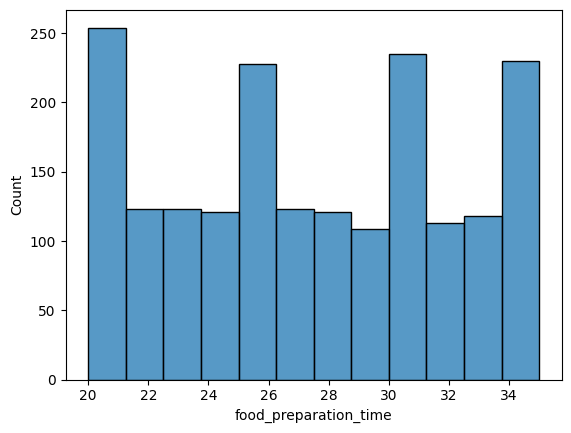

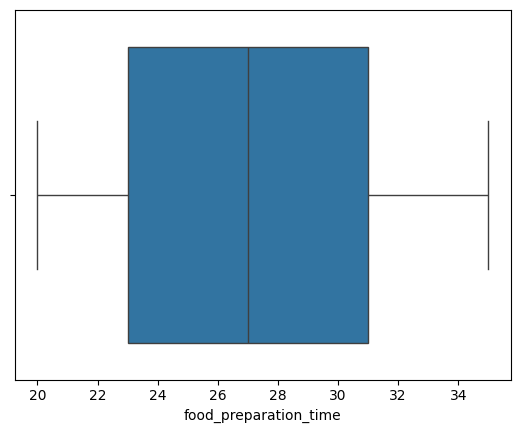

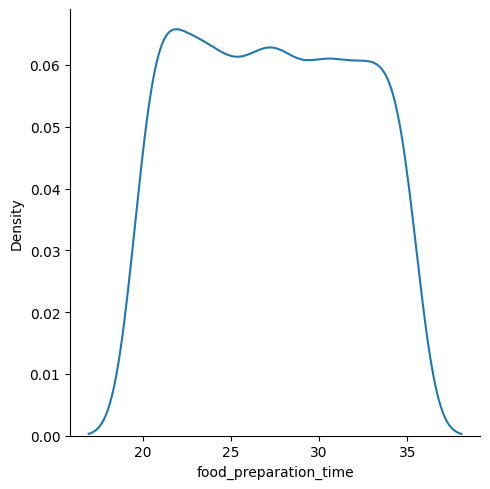

In [20]:
# this syntax will show the histogram distribution of the variable 'cost_of_the_order'
sns.histplot(data = data, x = 'food_preparation_time');
plt.show()
sns.boxplot(data = data, x = 'food_preparation_time')
plt.show()
sns.displot(data=data,x='food_preparation_time',kind='kde')
plt.show()

#### Observations:

- Plotted the variable in a histogram, boxplot a kernel density estimate plot (kde) to see the distribution of the variable
- The plots show that there are no outliers and the distribution has a normal but peculiar form where most of the values are spread between 20 to 35 min.
- The histogram shows that the data is roughly uniformly distributed.
There are no clear peaks, indicating that food preparation times are spread evenly across the range from around 20 to 35 minutes. No specific time interval dominates, meaning all durations are almost equally frequent.
- The boxplot confirms the symmetry of the distribution.Median is approximately in the middle of the interquartile range (around 27–28 minutes). There are no outliers, and the data is well spread between the minimum and maximum values.
Whiskers are nearly equal in length, reinforcing the even spread of values.
-The KDE plot is relatively flat, further supporting that the distribution is close to uniform. There are no strong modes (peaks), suggesting no single preparation time is dominant.The slight undulations are common in KDEs and do not indicate significant skewness or modality.



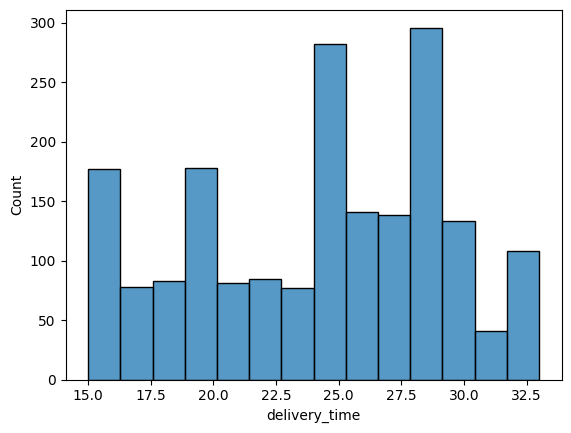

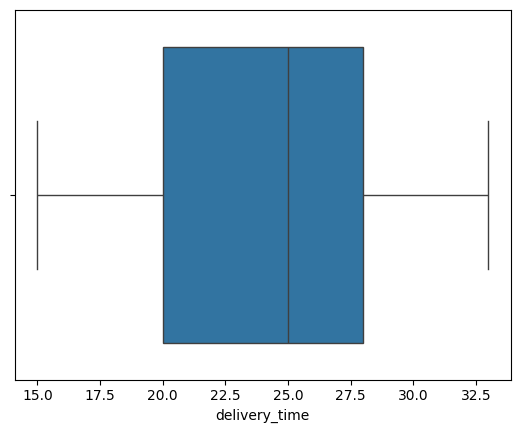

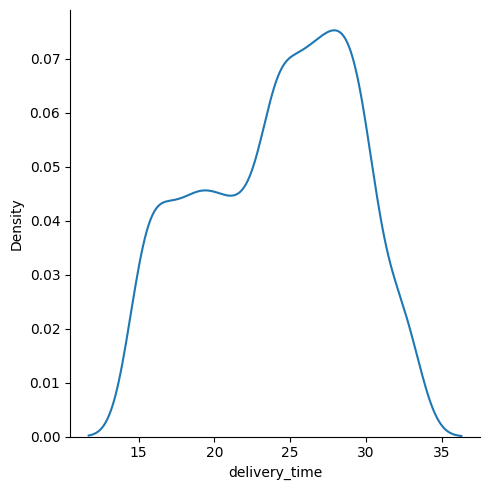

In [31]:
# this syntax will show the histogram distribution of the variable 'cost_of_the_order'
sns.histplot(data = data, x = 'delivery_time');
plt.show()
sns.boxplot(data = data, x = 'delivery_time')
plt.show()
sns.displot(data=data,x='delivery_time',kind='kde')
plt.show()

#### Observations:

- The histogram shows a slightly right-skewed distribution, but relatively uniform with some mild peaks around 20, 25, and 28 minutes.

Most delivery times are spread fairly evenly between 15 and 33 minutes.

There is no strong single peak, suggesting deliveries are fairly consistent but not clustered around one value.

- The boxplot reveals a fairly symmetric spread, with the median around 25 minutes.

The interquartile range (IQR) appears to span roughly from 20 to 29 minutes.

There are no visible outliers, and the whiskers are approximately equal in length, indicating balanced spread.

- The KDE curve indicates a bimodal or multimodal distribution with minor peaks — most notably:

One around 20 minutes

Another broader one around 28–29 minutes

The distribution is not perfectly smooth or normal, but it does not show extreme skewness.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Write the code here

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Write the code here

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
# Write the code here

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Write the code here

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [26]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [27]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [28]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [29]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [30]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---